In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sys
sys.path.insert(1, '../../utils/')
import src_utils

In [32]:
point_muts = pd.read_csv('../../utils/point_muts.csv', index_col=0, header=[0,1])
resids = pd.read_csv('../../utils/residuals.csv', index_col=0)['raw_resids'].values
rad_scores = point_muts.loc[:, ('Radicicol', 'score')].values
dmso_scores = point_muts.loc[:, ('Zero', 'score')].values
resid_heatmap = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0).values

In [5]:
#Fit linear model to any dataset
model = sm.OLS(rad_scores, dmso_scores)
results = model.fit()

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external

In [14]:
variant_index = src_utils.create_variant_index(point_muts)
cooks_d_map = src_utils.create_heatmap_arr(cooks_d[0], variant_index)

In [27]:
idx = cooks_d_map > (4. / 3501.)
np.savetxt('../../utils/analysis_utils/cooks_d_client_idx.csv', idx)
idx2 = cooks_d_map > (1. / 3501.)
np.savetxt('../../utils/analysis_utils/cooks_d_client_1_idx.csv', idx2)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
resid_heatmap

array([[        nan,         nan,         nan, ..., -0.01223384,
                nan,         nan],
       [        nan,  0.14050133,         nan, ...,  0.1244217 ,
        -0.49186796,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -0.16682683,  0.09613498, ...,  0.01383697,
        -0.14881201,  0.14225256],
       [        nan,         nan, -0.30839186, ..., -0.27160963,
        -0.0149728 ,         nan]])

Text(0, 0.5, 'Radicicol activity score')

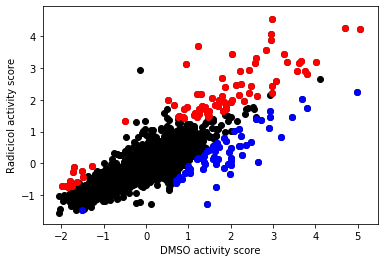

In [39]:
positive = resids > 0
negative = resids < 0

idx = cooks_d[0] > (4. / 3501.)

ihb_clients = idx & positive
dep_clients = idx & negative
plt.scatter(dmso_scores, rad_scores, color='k')
plt.scatter(dmso_scores[ihb_clients], rad_scores[ihb_clients], color='r')
plt.scatter(dmso_scores[dep_clients], rad_scores[dep_clients], color='b')
plt.xlabel('DMSO activity score')
plt.ylabel('Radicicol activity score')

In [35]:
type(idx)

numpy.ndarray